# Before your start:

    Read the README.md file
    Comment as much as you can and use the resources (README.md file)
    Happy learning!

In this exercise, we  will generate random numbers from the continuous disributions we learned in the lesson. There are two ways to generate random numbers:

1. Using the numpy library 
1. using the Scipy library 

Use either or both of the lbraries in this exercise.

In [121]:
import numpy as np
from scipy.stats import uniform
from scipy.stats import expon
import matplotlib.pyplot as plt
import pandas as pd

## Uniform Distribution

To generate uniform random numbers between any two given values using scipy, we can either use the following code or the code that we have
discussed in class:

In [12]:
x = uniform.rvs(size=10)
a = 2
b = 3
randoms  = a + (b-a)*x
print(randoms)

[2.25948536 2.49814038 2.97283185 2.50426479 2.77268147 2.26422261
 2.6085252  2.31959204 2.9487517  2.21981799]


**Your task:**

1. Based on the code above, write a function that generates uniformly distributed random numbers. There are several requirements for your function:
    * It should accept 3 parameters: 
        * `bottom` - the lower boundary of the generated numbers
        * `ceiling` - the upper boundary of the generated numbers
        * `count` - how many numbers to generate
    * It should return an array of uniformly distributed random numbers

1. Call your function with 2 sets of params below:
    * bottom=10, ceiling=15, count=100
    * bottom=10, ceiling=60, count=1,000

1. Plot the uniform distributions generated above using histograms, where x axis is the value and y axis is the count. Let the histogram's number of bins be 10.

Your output should look like below:

![uniform distribution](ud.png)

In [51]:
# your code here
def randomUnif(bottom,ceiling,count):
    return np.random.uniform(low=bottom, high=ceiling, size=count)

a = randomUnif(10,15,100)
b = randomUnif(10,60,1000)

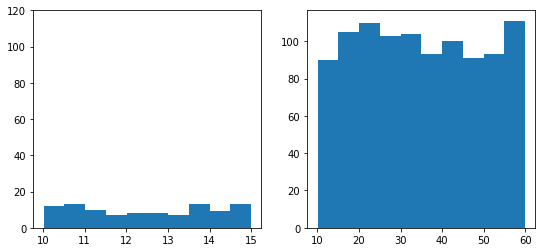

In [54]:
plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.ylim(0,120)
plt.hist(a,bins=10)
plt.subplot(1,2,2)
plt.hist(b,bins=10)
plt.show()

How are the two distributions different?

Se diferencian en el tamaño muestral: el array a se compone de 100 valores, mientras que el b se compone de 1000 (por ello las frecuencias del histograma derecho (array b) son mayores). Y se diferencian también en el rango de valores, mientras que el a va desde un mínimo de 10 hasta un máximo de 15, el array b va desde un mínimo de 10 hasta un máximo de 60.

## Normal Distribution

1. In the same way in the Uniform Distribution challenge, write a function that generates normally distributed random numbers.
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 1
1. Generate 1,000 normally distributed numbers with the average of 10 and standard deviation of 50
2. Plot the distributions of the data generated.

Expected output:

![normal distribution](nd.png)

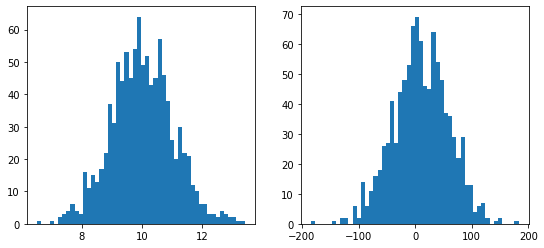

In [35]:
# your code here
def randNorm(loc,scale,size):
    return np.random.normal(loc=loc, scale=scale, size=size)

a = randNorm(10,1,1000)
b = randNorm(10,50,1000)

plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.hist(a,bins=50)
plt.subplot(1,2,2)
plt.hist(b,bins=50)
plt.show()

How are the two distributions different?

### your answer below
A pesar de que la media de los datos en ambos array está entorno a 10, en el primer histograma (array a) se observa una menor dispersión de los datos y esto es debido a se le ha impuesto una desviación estandar menor (el valor scale) que a los datos represntados en el segundo histograma (array b). Por ello, en el segundo histograma hay datos que se alejan mucho de la media (loc).


## Normal Distribution of Real Data

In this challenge we are going to take a look the real data. We will use vehicles.csv file for this exercise

First import vehicles.csv.
Then plot the histograms for the following variables:

1. Fuel Barrels/Year

In [56]:
df = pd.read_csv("vehicles.csv")

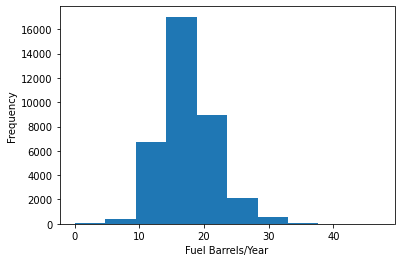

In [79]:
# your code here
def histPlot(dataF, name):
    plt.hist(dataF,bins=10)
    plt.xlabel(name)
    plt.ylabel("Frequency")
    plt.show()

df_Fuel = df["Fuel Barrels/Year"]
histPlot(df_Fuel,"Fuel Barrels/Year")

2. CO2 Emission Grams/Mile 

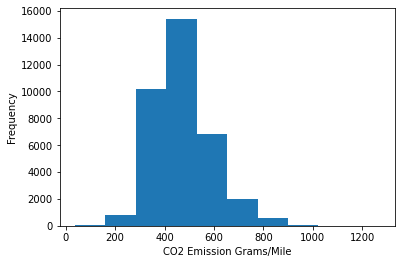

In [80]:
# your code here
df_CO2 = df["CO2 Emission Grams/Mile"]
histPlot(df_CO2,"CO2 Emission Grams/Mile")

3. Combined MPG

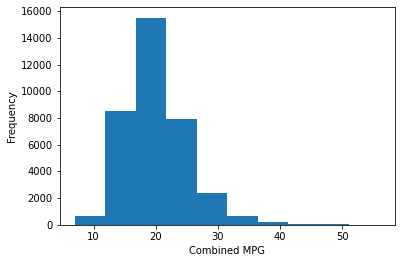

In [85]:
# your code here
df_MPG = df["Combined MPG"]
histPlot(df_MPG,"Combined MPG")

Which one(s) of the variables are nearly normally distributed? How do you know?

### your answer here
Las tres variables se ajustan una distribución normal ya que los datos se reparten de manera simétrica a ambos lados de la moda/media.

## Exponential Distribution

1. Using `numpy.random.exponential`, create a function that returns a list of numbers exponentially distributed with the mean of 10. 

1. Use the function to generate two number sequences with the size of 10 and 100.

1. Plot the distributions as histograms with the nubmer of bins as 100.

Your output should look like below:

![exponential distribution](ed.png)

In [119]:
# your code here
def randExp(size):
    return np.random.exponential(scale=10, size=size)

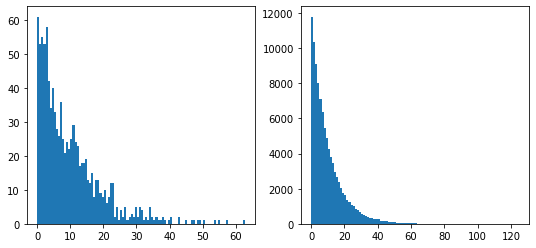

In [120]:
a = randExp(1000)
b = randExp(100000)

plt.figure(figsize=(9,4))
plt.subplot(1,2,1)
plt.hist(a,bins=100)
plt.subplot(1,2,2)
plt.hist(b,bins=100)
plt.show()
# he bajado los bins a 40 porque con el tamaño muestral que tenemos (10 y 100), 100 bins era demasiado

How are the two distributions different?

### your answer here
la distribución es mucho más continua en el histograma de la derecha (array b). Ambos tienen una media entorno a 10, pero al tener un mayor tamaño muestral, en el segundo array se observa que los datos son más continuos

## Exponential Distribution of Real Data

Suppose that the amount of time one spends in a bank is exponentially distributed with mean as 10 minutes (i.e. λ = 1/10). What is the probability that a customer will spend less than fifteen minutes in the bank? 

Write a code in python to solve this problem

In [136]:
# your answer here
# Hint: This is same as saying P(x<15)
# Tengo que usar la función de distribución acumulativa
Pmenor15 = expon.cdf(15, scale=10)
Pmenor15

0.7768698398515702

What is the probability that the customer will spend more than 15 minutes

In [137]:
# your answer here
#La probabilidad de que pase más de 15 minutos, es 1 menos la probabilidad de que pase 15 minutos. Es decir:

Pmayor15 = 1-Pmenor15
Pmayor15

0.2231301601484298